<a href="https://colab.research.google.com/github/Gopinath-v-07/Fraud_detection_backend/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip install -q \
pandas numpy scipy \
scikit-learn imbalanced-learn \
matplotlib seaborn plotly \
xgboost lightgbm \
streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# Imbalance handling
from imblearn.over_sampling import SMOTE

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

DATA PATH


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
DATA_PATH = "/content/drive/MyDrive/credit_card_data/creditcard.csv"

df = pd.read_csv(DATA_PATH)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
def data_audit(df):
    return pd.DataFrame({
        "Rows": [df.shape[0]],
        "Columns": [df.shape[1]],
        "Missing Values": [df.isnull().sum().sum()],
        "Duplicate Rows": [df.duplicated().sum()]
    })

data_audit(df)

,Rows,Columns,Missing Values,Duplicate Rows
0,284807,31,0,1081


Class
0    284315
1       492
Name: count, dtype: int64


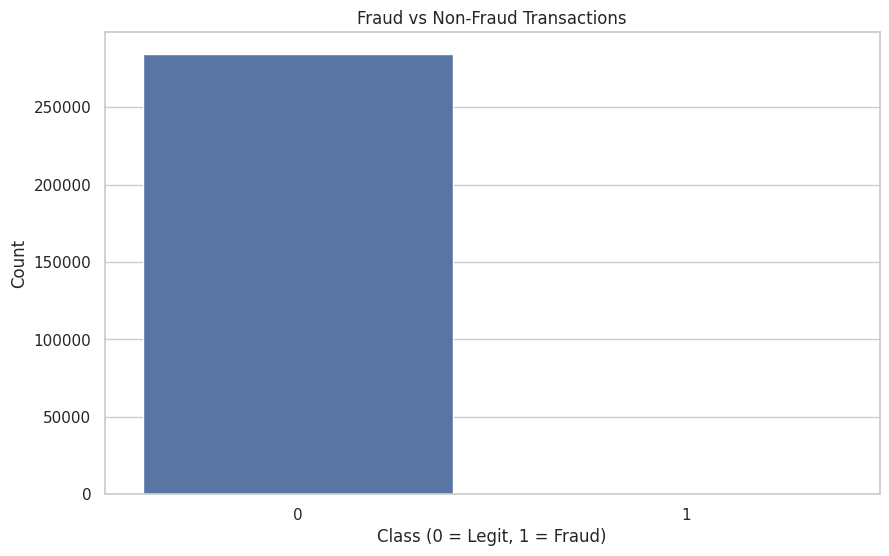

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = df["Class"].value_counts()

print(class_counts)

sns.barplot(
    x=class_counts.index,
    y=class_counts.values
)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(
    X_train, y_train
)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_res))

Before SMOTE: [227451    394]
After SMOTE : [227451 227451]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC: 0.970987885165321


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
iso_forest = IsolationForest(
    n_estimators=300,
    contamination=0.0017,  # fraud ratio ≈ 0.17%
    max_samples="auto",
    random_state=42,
    n_jobs=-1
)

iso_forest.fit(X_train)

IsolationForest(contamination=0.0017, n_estimators=300, n_jobs=-1,
                random_state=42)

In [ ]:
# Isolation Forest outputs: 1 (normal), -1 (anomaly)
y_pred_raw = iso_forest.predict(X_test)

# Convert to fraud labels: 1 = fraud, 0 = legit
y_pred = np.where(y_pred_raw == -1, 1, 0)

# Anomaly score (higher = more anomalous)
y_scores = -iso_forest.decision_function(X_test)

print("ROC-AUC:", roc_auc_score(y_test, y_scores))
print(classification_report(y_test, y_pred))

ROC-AUC: 0.9530455049211581
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.28      0.29      0.28        98

    accuracy                           1.00     56962
   macro avg       0.64      0.64      0.64     56962
weighted avg       1.00      1.00      1.00     56962



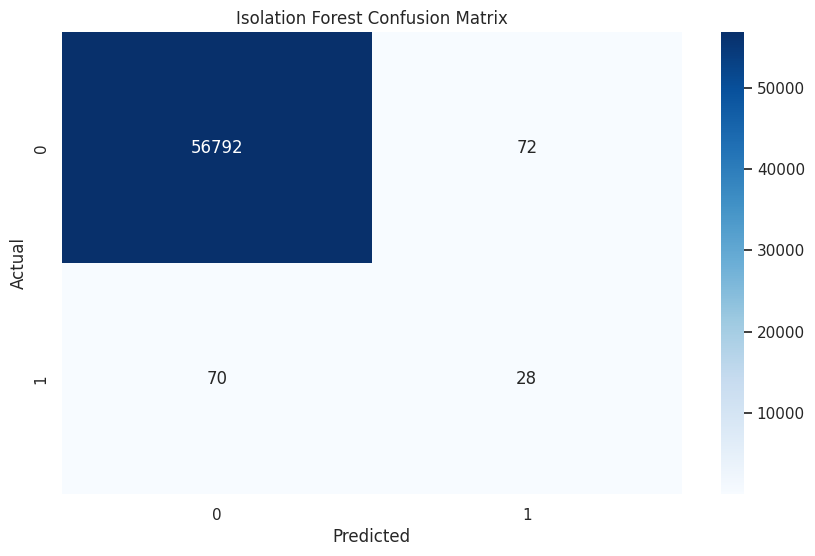

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Isolation Forest Confusion Matrix")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
X_train_ae = X_train[y_train == 0]
X_test_ae = X_test

In [ ]:
input_dim = X_train_ae.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation="relu")(input_layer)
encoded = Dense(16, activation="relu")(encoded)

decoded = Dense(32, activation="relu")(encoded)
decoded = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(
    optimizer="adam",
    loss="mse"
)

In [ ]:
history = autoencoder.fit(
    X_train_ae,
    X_train_ae,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7245 - val_loss: 0.3191
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2906 - val_loss: 0.2151
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2075 - val_loss: 0.1679
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1674 - val_loss: 0.1419
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1437 - val_loss: 0.1313
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1307 - val_loss: 0.1252
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1226 - val_loss: 0.1085
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1111 - val_loss: 0.1002
Epoch 9/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0994 - val_loss: 0.0834
Epoch 10/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0848 - val_loss: 0.0737
Epoch 11/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0760 - val_loss: 0.0691
Epoch 12/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [ ]:
reconstructions = autoencoder.predict(X_test_ae)

reconstruction_error = np.mean(
    np.square(X_test_ae - reconstructions),
    axis=1
)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
threshold = np.percentile(reconstruction_error, 99.5)
y_pred_ae = (reconstruction_error > threshold).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, reconstruction_error))
print(classification_report(y_test, y_pred_ae))



ROC-AUC: 0.9336043822424862
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.28      0.82      0.42        98

    accuracy                           1.00     56962
   macro avg       0.64      0.91      0.71     56962
weighted avg       1.00      1.00      1.00     56962



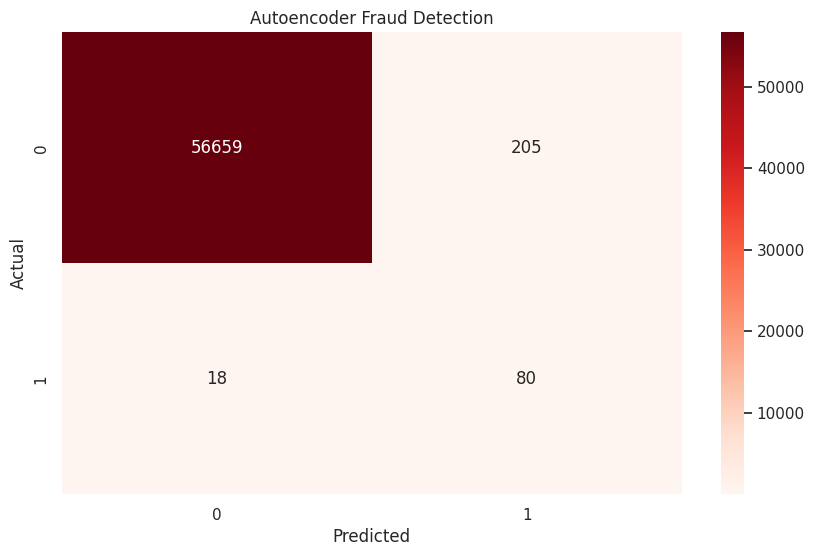

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_ae),
    annot=True,
    fmt="d",
    cmap="Reds"
)
plt.title("Autoencoder Fraud Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
results = pd.DataFrame({
    "Model": ["Isolation Forest", "Autoencoder"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_scores),
        roc_auc_score(y_test, reconstruction_error)
    ]
})

results

,Model,ROC-AUC
0,Isolation Forest,0.953046
1,Autoencoder,0.933604


In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_proba_xgb > 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))
print(classification_report(y_test, y_pred_xgb))

ROC-AUC: 0.9800121019144855
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.86      0.65        98

    accuracy                           1.00     56962
   macro avg       0.76      0.93      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm_model.fit(X_train_res, y_train_res)

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.273067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=400,
               random_state=42, subsample=0.8)

In [ ]:
y_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
y_pred_lgbm = (y_proba_lgbm > 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_proba_lgbm))
print(classification_report(y_test, y_pred_lgbm))

ROC-AUC: 0.9446274605790543
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.83      0.75        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



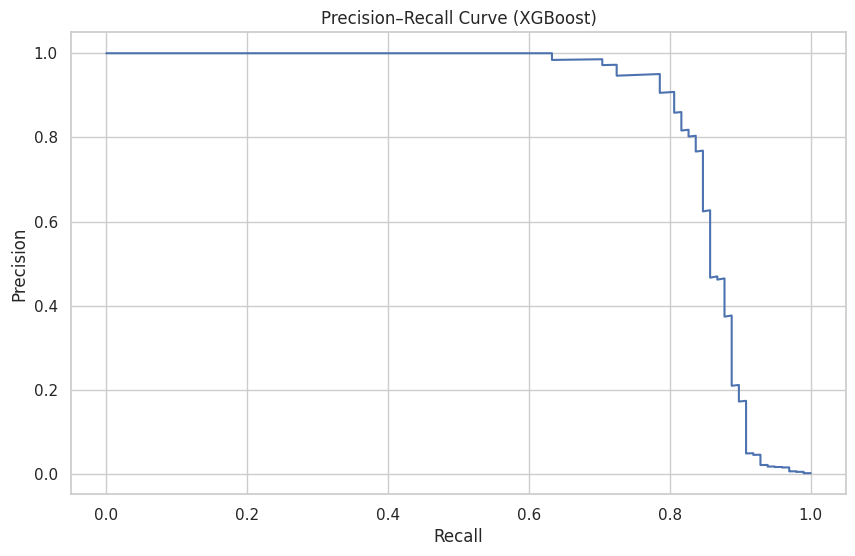

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, y_proba_xgb
)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (XGBoost)")
plt.show()

In [ ]:
target_recall = 0.85

recall_threshold = thresholds[
    np.argmax(recall >= target_recall)
]

recall_threshold

np.float32(1.4664636e-06)

In [ ]:
y_pred_custom = (y_proba_xgb >= recall_threshold).astype(int)

print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.50      0.00     56962
weighted avg       0.00      0.00      0.00     56962



In [ ]:
cm = confusion_matrix(y_test, y_pred_custom)
tn, fp, fn, tp = cm.ravel()

total_cost = (fn * 10000) + (fp * 500)

print("Confusion Matrix:\n", cm)
print("Estimated Business Cost: ₹", total_cost)

Confusion Matrix:
 [[    0 56864]
 [    0    98]]
Estimated Business Cost: ₹ 28432000


In [ ]:
summary = pd.DataFrame({
    "Model": ["Isolation Forest", "Autoencoder", "XGBoost", "LightGBM"],
    "Key Strength": [
        "Unsupervised anomaly detection",
        "Deep pattern learning",
        "Best overall fraud performance",
        "Fast real-time scoring"
    ]
})

summary

,Model,Key Strength
0,Isolation Forest,Unsupervised anomaly detection
1,Autoencoder,Deep pattern learning
2,XGBoost,Best overall fraud performance
3,LightGBM,Fast real-time scoring


In [ ]:
import joblib

joblib.dump(iso_forest, "isolation_forest.pkl")
joblib.dump(xgb_model, "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
iso_forest = joblib.load("isolation_forest.pkl")
xgb_model = joblib.load("xgboost_model.pkl")
scaler = joblib.load("scaler.pkl")

In [ ]:
def fraud_score(transaction):
    """
    transaction: numpy array shape (1, n_features)
    returns: fraud probability (0–1)
    """
    transaction_scaled = scaler.transform(transaction)

    iso_score = -iso_forest.decision_function(transaction_scaled)[0]
    xgb_score = xgb_model.predict_proba(transaction_scaled)[0][1]

    # Normalize Isolation Forest score
    iso_score = (iso_score - 0) / (1 + iso_score)

    # Weighted ensemble
    final_score = (0.6 * xgb_score) + (0.4 * iso_score)
    return final_score

In [ ]:
def simulate_transaction(df):
    sample = df.sample(1).drop("Class", axis=1)
    label = df.loc[sample.index, "Class"].values[0]
    return sample.values, label

In [ ]:
transaction, actual = simulate_transaction(df)
score = fraud_score(transaction)

threshold = 0.6
prediction = int(score >= threshold)

print("Fraud Score:", round(score, 3))
print("Predicted:", "FRAUD" if prediction else "LEGIT")
print("Actual   :", "FRAUD" if actual else "LEGIT")

Fraud Score: -0.137
Predicted: LEGIT
Actual   : LEGIT


In [ ]:
!pip install streamlit
import streamlit as st
import numpy as np
import joblib

iso_forest = joblib.load("isolation_forest.pkl")
xgb_model = joblib.load("xgboost_model.pkl")
scaler = joblib.load("scaler.pkl")

st.set_page_config(page_title="Fraud Detection System", layout="centered")
st.title("💳 Real-Time Fraud Detection")

st.markdown("Enter transaction features:")

input_data = []
for i in range(30):
    val = st.number_input(f"Feature {i+1}", value=0.0)
    input_data.append(val)

if st.button("Check Fraud"):
    transaction = np.array(input_data).reshape(1, -1)
    transaction_scaled = scaler.transform(transaction)

    iso_score = -iso_forest.decision_function(transaction_scaled)[0]
    xgb_score = xgb_model.predict_proba(transaction_scaled)[0][1]

    final_score = (0.6 * xgb_score) + (0.4 * iso_score)

    st.metric("Fraud Probability", f"{final_score:.2f}")

    if final_score >= 0.6:
        st.error("🚨 FRAUD DETECTED")
    else:
        st.success("✅ Legitimate Transaction")

2026-02-03 04:27:45.261 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 04:27:45.262 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 04:27:45.753 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-03 04:27:45.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 04:27:45.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 04:27:45.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 04:27:45.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [ ]:
import joblib

joblib.dump(iso_forest, "isolation_forest.pkl")
joblib.dump(xgb_model, "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Models saved successfully")

Models saved successfully


In [ ]:
from google.colab import files

files.download("isolation_forest.pkl")
files.download("xgboost_model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>